In [1]:
pip install lime

In [2]:
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.svm import SVC

drive.mount('/content/drive', force_remount=True)

model_path = '/content/drive/My Drive/IDS models/NF-ToN-IoT-V2_support_vector_classifier.pkl'
support_vector_classifier = joblib.load(model_path)

test_data = pd.read_csv('/content/drive/My Drive/IDS data sets/NF-ToN-IoT-V2_5000 samples_minmax_normalized_test.csv')

X_test = test_data.iloc[:, :-2]
y_test = test_data.iloc[:, -1]

support_vector_classifier = joblib.load(model_path)

# Modify the SVC to enable probability estimates
support_vector_classifier.probability = True

# Retrain the model if necessary
support_vector_classifier.fit(X_test, y_test)

explainer = shap.KernelExplainer(support_vector_classifier.predict_proba, X_test)#.sample(500, random_state=42))

shap_values = explainer.shap_values(X_test.iloc[:10])

Mounted at /content/drive


  0%|          | 0/10 [00:00<?, ?it/s]

In [3]:
class_names = y_test.unique()  # Get unique values from the target variable
class_names

array(['Benign', 'xss', 'scanning', 'dos', 'password', 'ddos',
       'injection', 'mitm'], dtype=object)

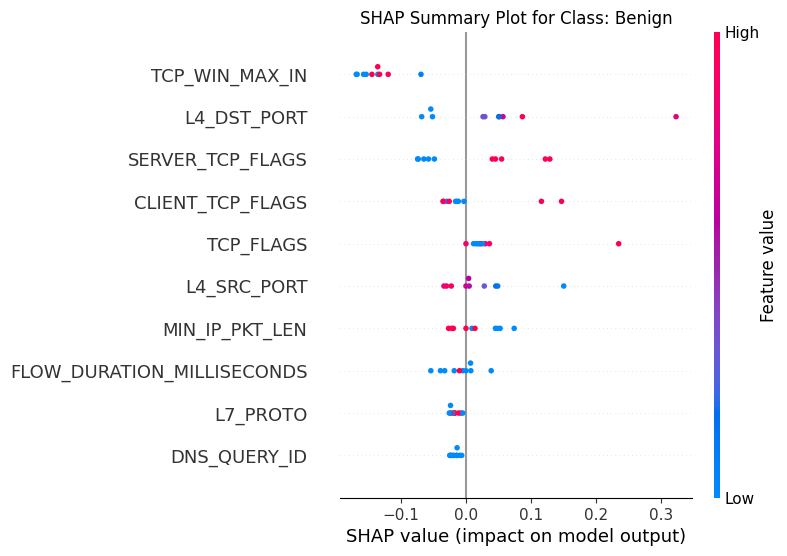

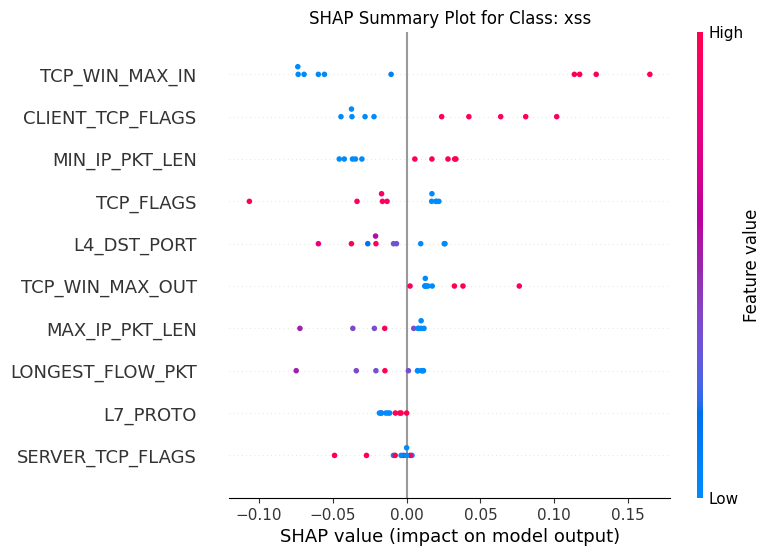

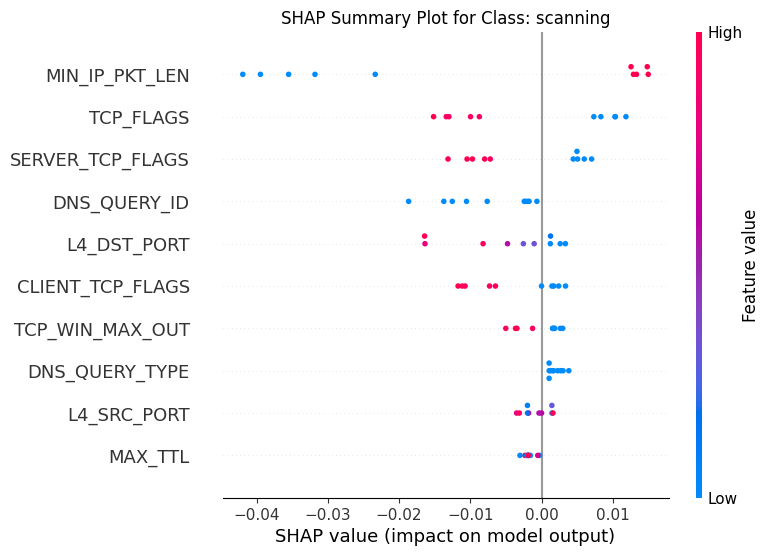

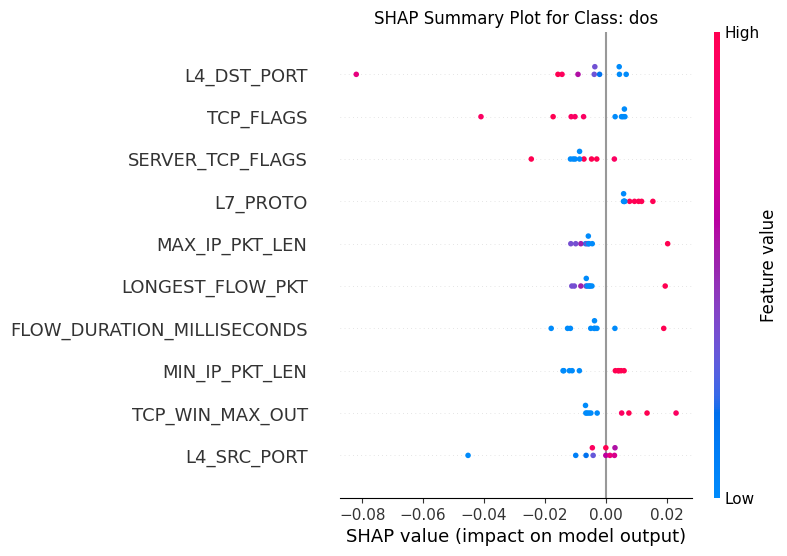

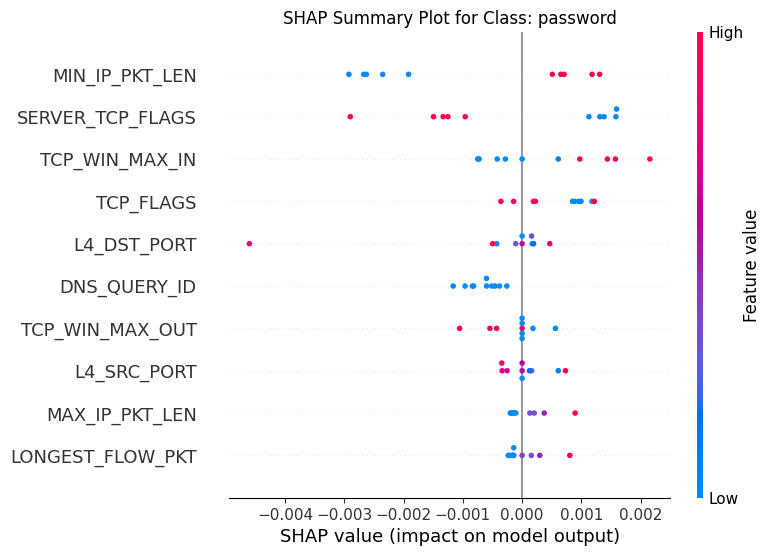

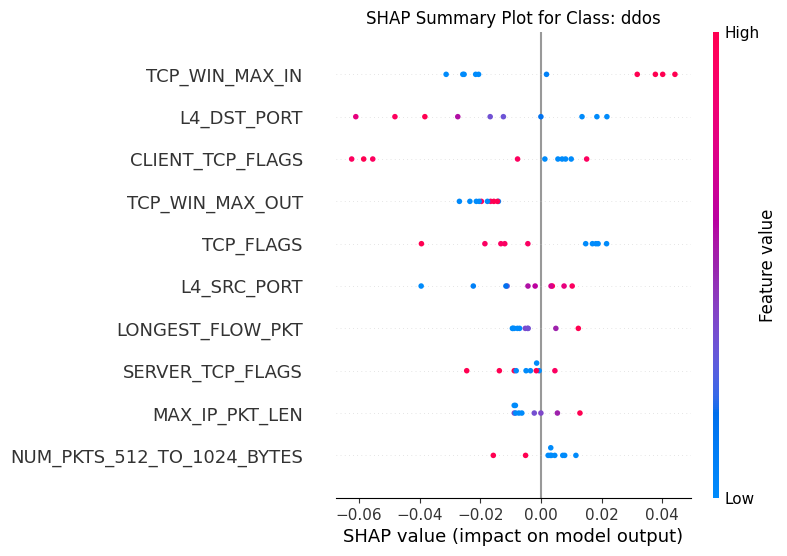

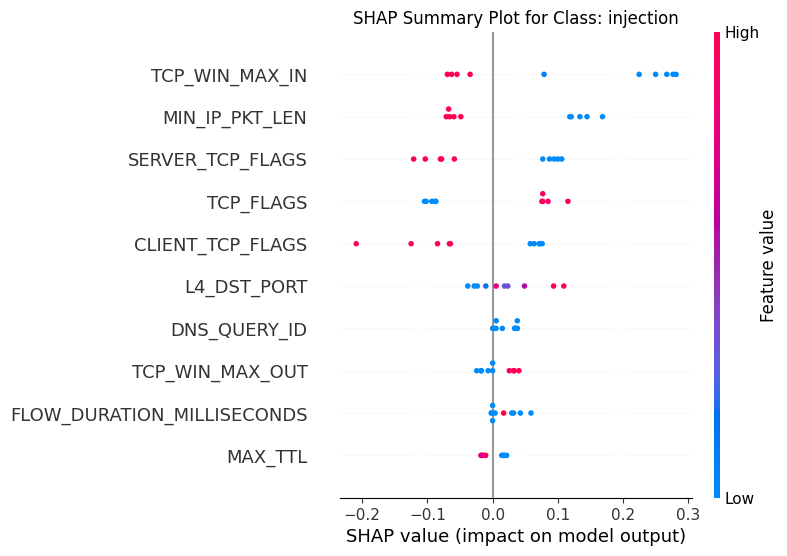

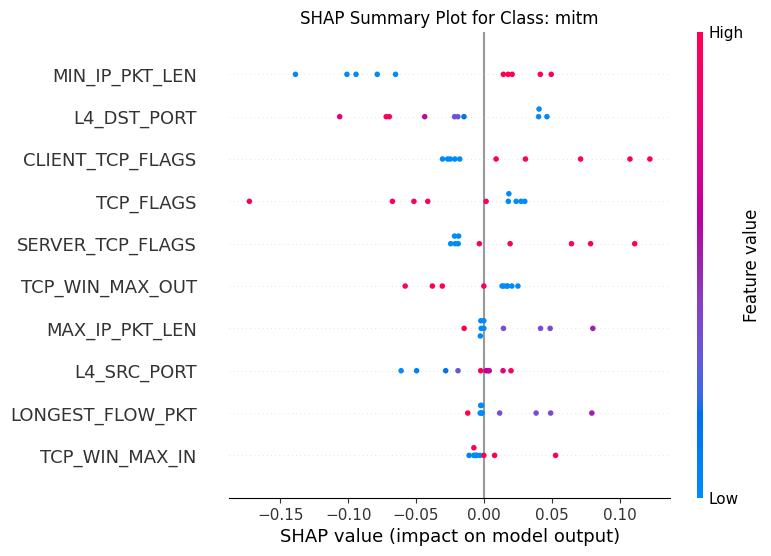

In [4]:
import matplotlib.pyplot as plt

# Plotting with adjusted figure size
num_classes = len(class_names)  # Get the correct number of classes

for class_index in range(num_classes):
    shap_values_class = shap_values[:, :, class_index]

    # Set figure size before plotting
    plt.figure(figsize=(10, 6))  # Adjust width and height as needed

    # Use the same subset of X_test that was used for SHAP calculation
    X_test_subset = X_test.iloc[:10]

    shap.summary_plot(shap_values_class, X_test_subset, feature_names=X_test_subset.columns,
                      max_display=10, show=False)
    class_name = class_names[class_index]
    plt.title(f"SHAP Summary Plot for Class: {class_name}")

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

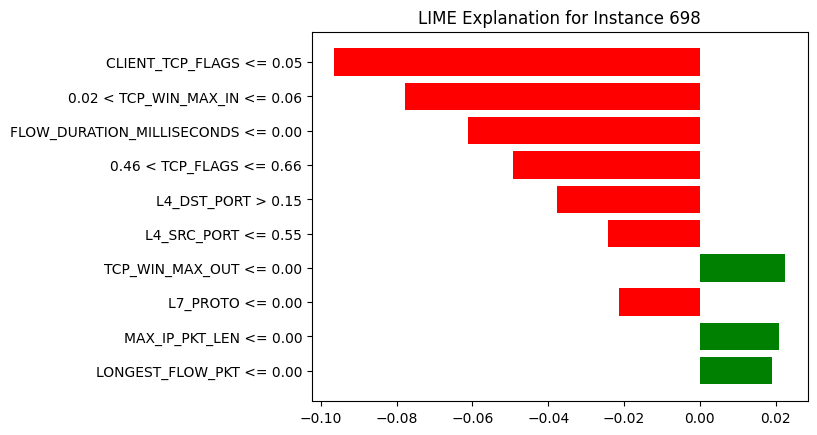

In [6]:
# LIME Explainability
# Initialize LIME explainer
import lime  # Import the lime module here
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_test),
    feature_names=X_test.columns,
    class_names=np.unique(y_test),
    mode='classification'
)

# Choose an instance to explain (for example, the first instance)
instance_to_explain = X_test.iloc[698]

# Generate LIME explanation
lime_exp = lime_explainer.explain_instance(
    data_row=instance_to_explain,
    predict_fn=support_vector_classifier.predict_proba
)

# Plot LIME explanation for the selected instance
lime_exp.as_pyplot_figure()
plt.title('LIME Explanation for Instance 698')
plt.show()